In [2]:
df = pd.read_csv("auto-mpg.csv")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [ ]:
df.info()

<Axes: ylabel='Frequency'>

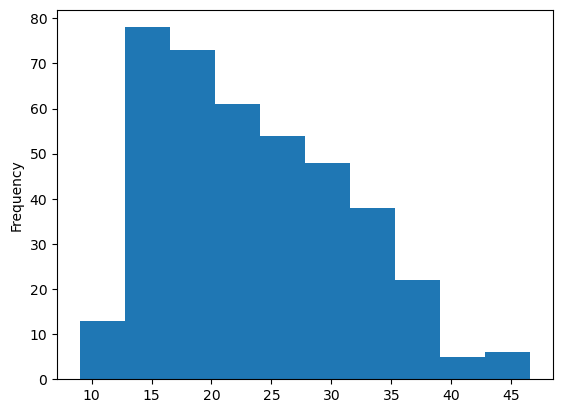

In [5]:
# When we have to find distribution use "KDE PLOT" or "HISTOGRAM"
# "KDE" gives better understanding
df["mpg"].plot(kind = "hist")

<Axes: xlabel='mpg', ylabel='Count'>

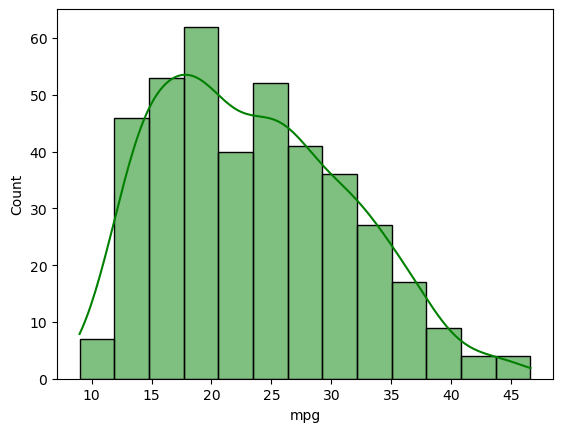

In [11]:
sns.histplot(data = df , x = df["mpg"] , kde = True , color = "g")

In [12]:
# How many cars are from each origin (USA,Europe,Japan)
df["origin"].value_counts()

origin
1    249
3     79
2     70
Name: count, dtype: int64

In [13]:
df["origin"] = df["origin"].map({1:"USA",2:"Europe",3:"Japan"})

In [ ]:
df["origin"].value_counts()

In [ ]:
sns.countplot(data = df, x = df["origin"] ,color = "k" )

In [ ]:
# Percentage of cylinders

In [ ]:
sns.boxplot(data = df, x = df["cylinders"] , y = df["mpg"])
# plt.xlabel("cylinders")
# plt.ylabel("mpg")
plt.show()

In [ ]:
# Distribution of displacement in the dataset
sns.histplot(data = df,x = df["displacement"] , kde = True)

In [ ]:
# Relationship between "MPG" and "horsepower" and "Weight"
df["horsepower"] = df["horsepower"].astype







<Axes: xlabel='mpg', ylabel='acceleration'>

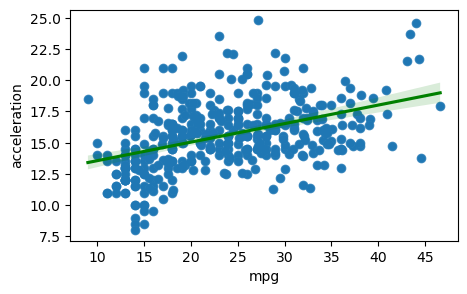

In [17]:
plt.figure(figsize = (5,3))
sns.scatterplot(data = df,x = df["mpg"] , y = df["acceleration"])
sns.regplot(data = df, x = df["mpg"] , y = df["acceleration"] , line_kws = {"color":"g"})

In [18]:
df.corr(method = 'CorrelationMethod' ,
min_periods =  df["mpg"],
numeric_only =  df["horsepower"])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [19]:
# Checing for missing values 
hp_is_digit = pd.DataFrame(df["horsepower"].str.isdigit())
df[hp_is_digit["horsepower"] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,USA,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,USA,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,Europe,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,USA,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,Europe,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,USA,amc concord dl


In [20]:
# Replacing them nwith np.nan
df = df.replace("?",np.nan)

In [21]:
#Checking whether there are missing values are there not
df[hp_is_digit["horsepower"] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,NaN,2046,19.0,71,USA,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,USA,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,Europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,USA,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,Europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,USA,amc concord dl


In [24]:
# Converting the type to float 64
# converting data type to float64

df["horsepower"] = df["horsepower"].astype("float64")





In [26]:
df["horsepower"] = df["horsepower"].fillna(df["horsepower"].median())


In [27]:
df["horsepower"].isna().sum()

0

In [28]:
numerical_cols = df[["mpg","acceleration","weight","horsepower","displacement"]]
numerical_cols

,mpg,acceleration,weight,horsepower,displacement
0,18.0,12.0,3504,130.0,307.0
1,15.0,11.5,3693,165.0,350.0
2,18.0,11.0,3436,150.0,318.0
3,16.0,12.0,3433,150.0,304.0
4,17.0,10.5,3449,140.0,302.0
...,...,...,...,...,...
393,27.0,15.6,2790,86.0,140.0
394,44.0,24.6,2130,52.0,97.0
395,32.0,11.6,2295,84.0,135.0
396,28.0,18.6,2625,79.0,120.0


<Axes: >

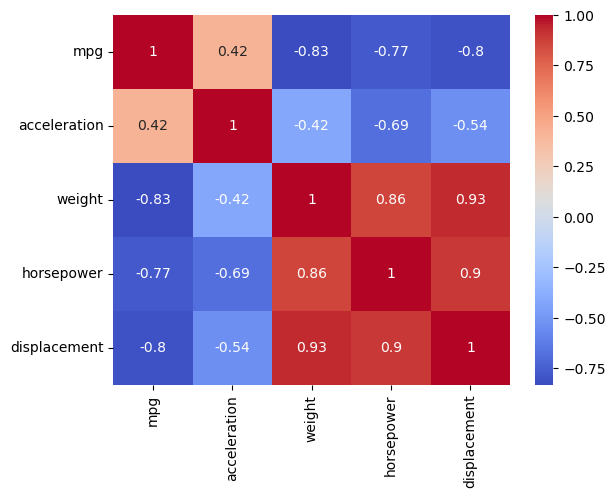

In [29]:
sns.heatmap(numerical_cols.corr(), annot = True ,  cmap="coolwarm")

In [8]:
df.groupby("mpg")["model year"].count().sort_values(ascending = False).head(10)

mpg
13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
16.0    13
19.0    12
25.0    11
24.0    11
28.0    10
Name: model year, dtype: int64

<Axes: >

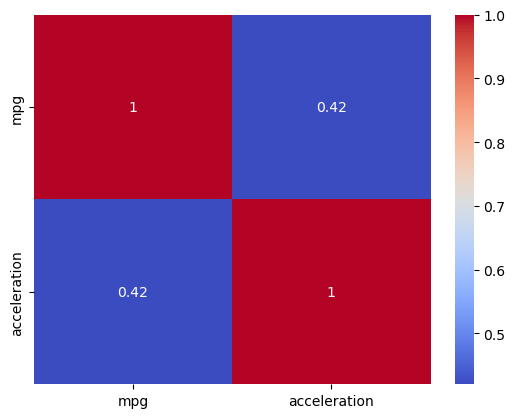

In [7]:
 a = df[["mpg","acceleration"]]
sns.heatmap(a.corr(),annot = True , cmap = "coolwarm")

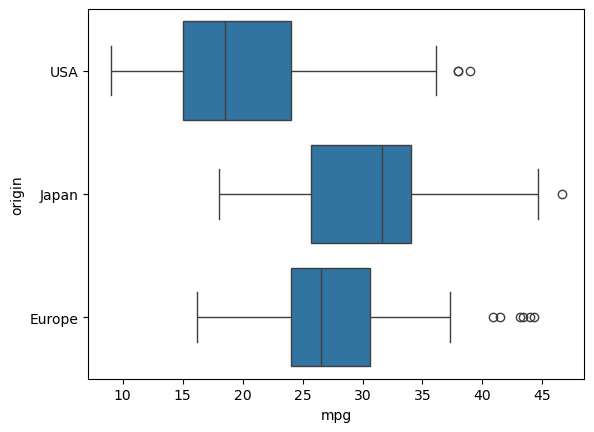

In [32]:
sns.boxplot(data = df , x = df["mpg"] , y = df["origin"])
plt.xlabel("mpg")
plt.ylabel("origin")
plt.show()

C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


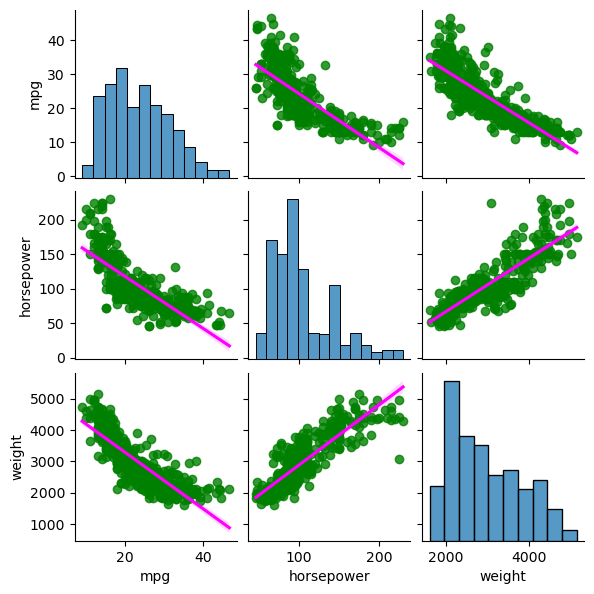

In [33]:
sns.pairplot(df[["mpg","horsepower","weight"]],
            diag_kind = "hist",
            kind="reg",
            plot_kws = {"scatter_kws":{"color":"green"},
                       "line_kws": {"color": "magenta"}
                       },
            height =2,
            aspect = 1) # width = height * aspect

<Axes: >

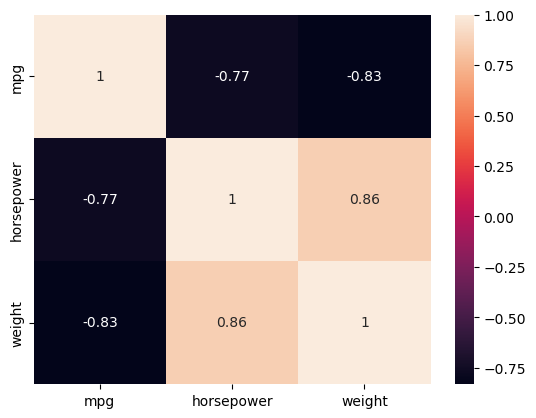

In [30]:
sns.heatmap(df[["mpg","horsepower","weight"]].corr(), annot = True) # annot is for cor values

<Axes: xlabel='horsepower'>

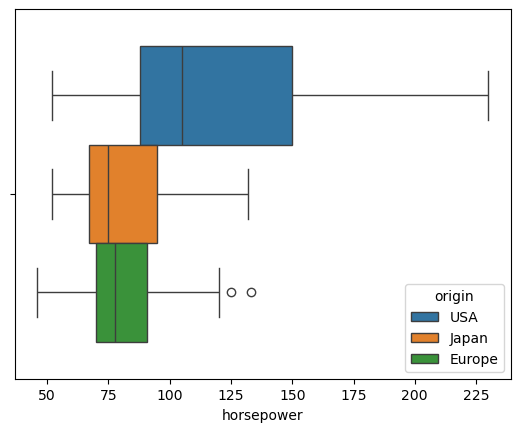

In [31]:
sns.boxplot(data = df,x = "horsepower", hue = "origin")

<Axes: xlabel='displacement', ylabel='Count'>

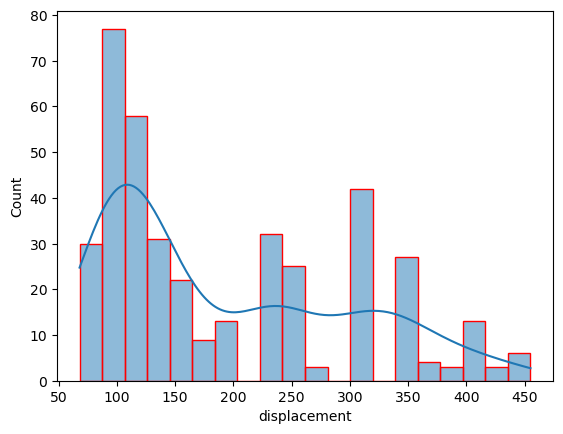

In [35]:
sns.histplot(data = df,x = "displacement",kde = True,bins = 20,edgecolor= "r")

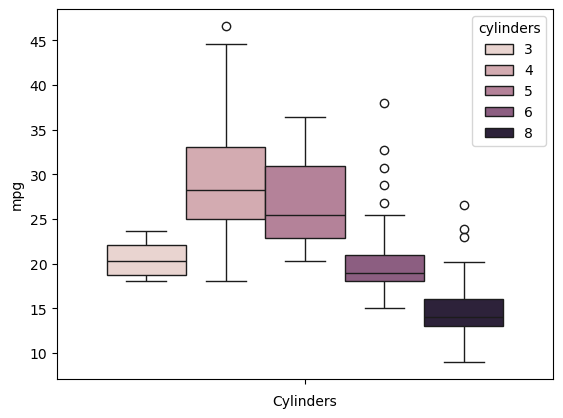

In [45]:
sns.boxplot(data = df,y = "mpg",hue = "cylinders")
plt.xlabel("Cylinders")
plt.ylabel("mpg")
plt.show()

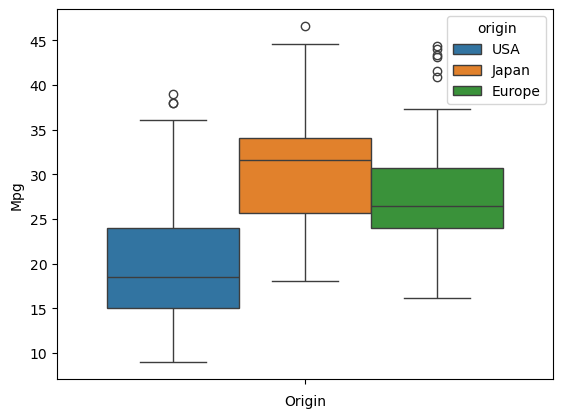

In [52]:
sns.boxplot(data = df,y = "mpg",hue = "origin")
plt.xlabel("Origin")
plt.ylabel("Mpg")
plt.show()

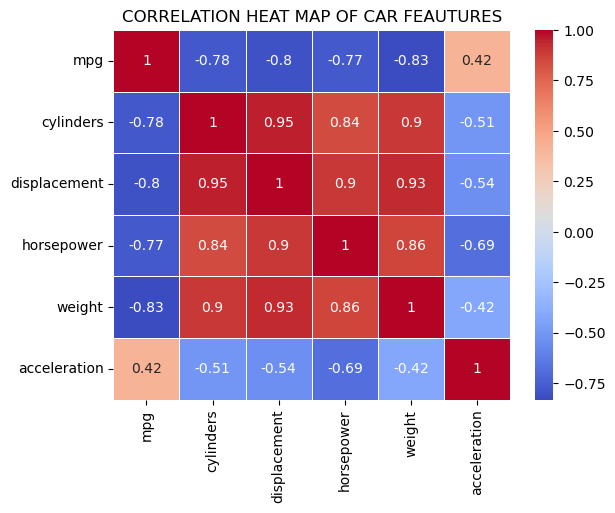

In [60]:
sns.heatmap(df[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration']]
            .corr(),annot = True,cmap = "coolwarm",linewidth = 0.5)
plt.title("CORRELATION HEAT MAP OF CAR FEAUTURES")
plt.show()


In [57]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


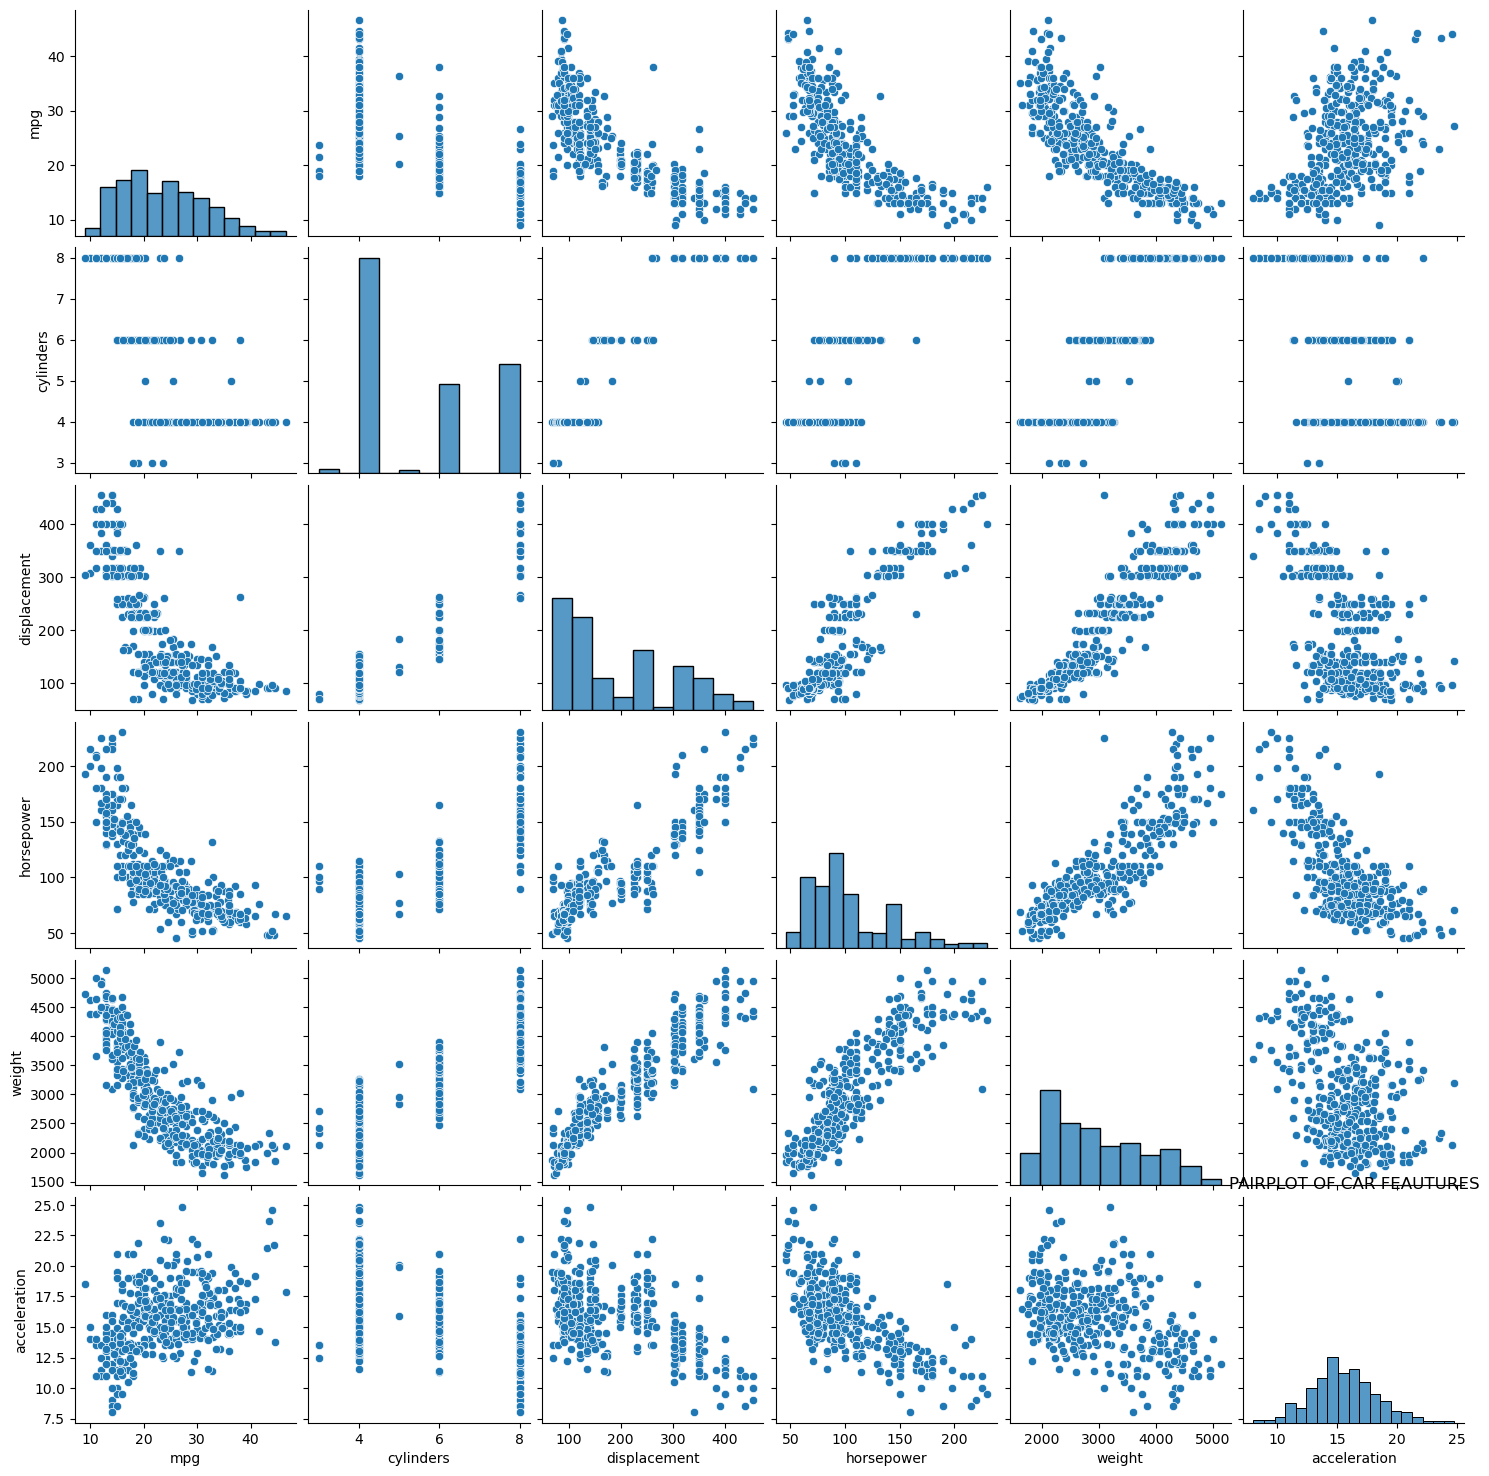

In [62]:
sns.pairplot(df[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration']])
plt.title("PAIRPLOT OF CAR FEAUTURES")
plt.show()


C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


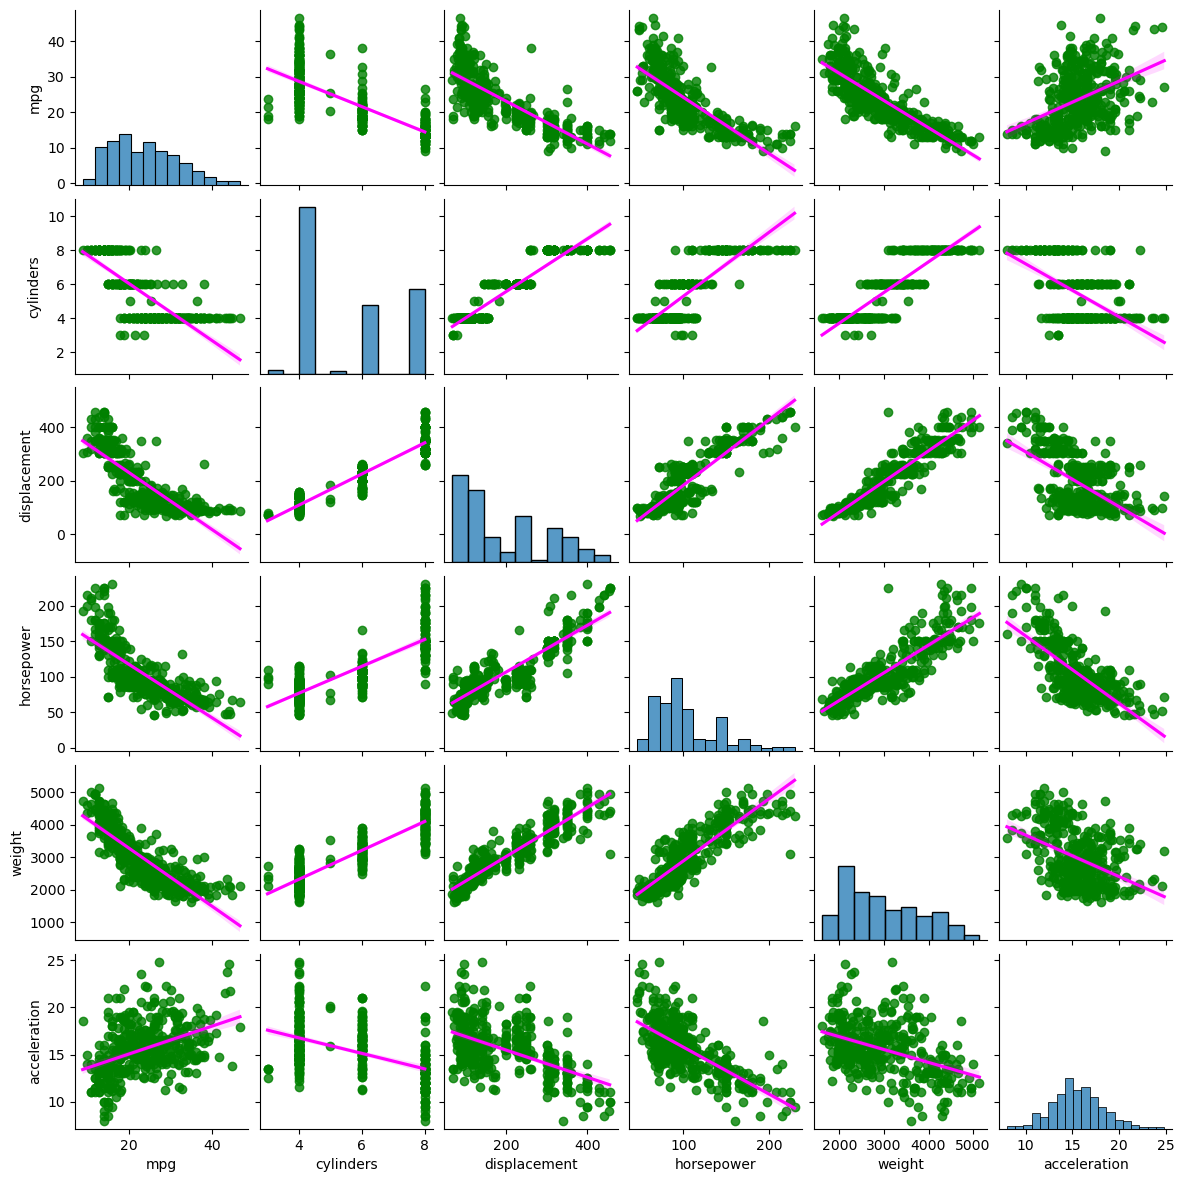

In [64]:
sns.pairplot(df[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration']],
        diag_kind = "hist",
                kind="reg",
                plot_kws = {"scatter_kws":{"color":"green"},
                           "line_kws": {"color": "magenta"}
                           },
                height =2,
                aspect = 1)

C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


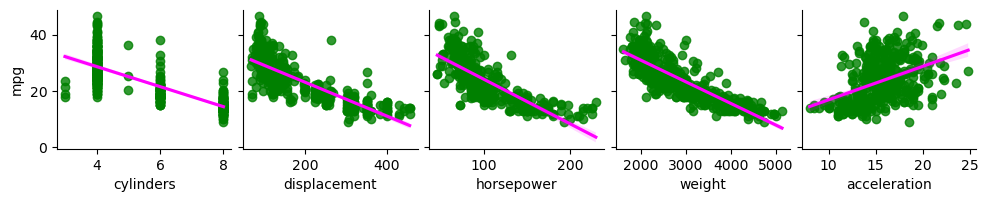

In [68]:
sns.pairplot(data = df,
             x_vars = ['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration'],
            y_vars = ["mpg"],
        diag_kind = "hist",
                kind="reg",
                plot_kws = {"scatter_kws":{"color":"green"},
                           "line_kws": {"color": "magenta"}
                           },
                height =2,
                aspect = 1)

<Axes: xlabel='acceleration', ylabel='Count'>

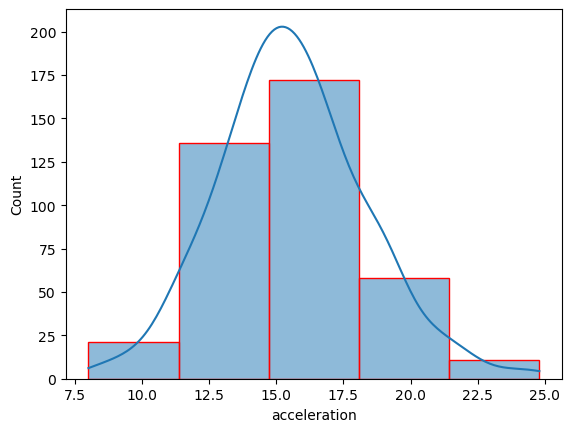

In [71]:
# WHAT is the distribuntion of acceleration 
sns.histplot(data = df,x = "acceleration",kde = True,bins = 5,edgecolor="r")

Text(0, 0.5, 'weight')

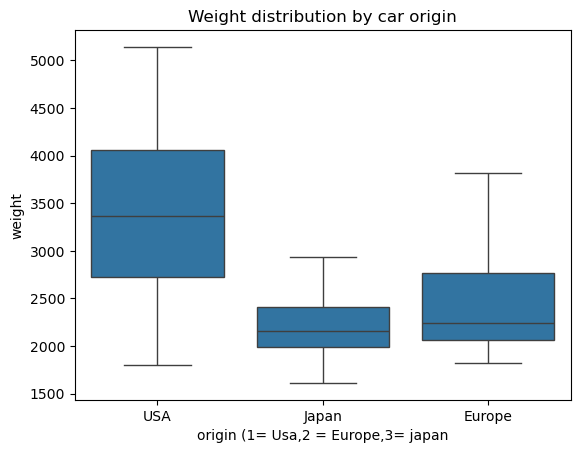

In [72]:
sns.boxplot(data = df,x = "origin",y = "weight")
plt.title("Weight distribution by car origin")
plt.xlabel("origin (1= Usa,2 = Europe,3= japan")
plt.ylabel("weight")

In [78]:
import plotly.express as px

# Load sample data

# Create a box plot
fig = px.box(df, x = "origin", y= "weight")

# Show the plot
fig.show()

In [79]:
px.box(df,x = "cylinders", y = "horsepower")

In [86]:
px.box(df,x = "origin", y = "horsepower")

# USA tend to have more horse power compared to Japan and Europe

In [94]:
px.bar(df,x = "model year",y = "mpg")


In [90]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [98]:
px.scatter(df,x = "acceleration",y = "mpg")